# Exploratory Analysis - 6

#### This analysis is to explore if there is a trend on racer's starting position and winning position.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
#Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
circuits_df = pd.read_csv('../Resources/Dataset/circuits.csv')
constructor_results_df = pd.read_csv('../Resources/Dataset/constructor_results.csv')
constructors_df = pd.read_csv('../Resources/Dataset/constructors.csv')
drivers_df = pd.read_csv('../Resources/Dataset/drivers.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
status_df = pd.read_csv('../Resources/Dataset/status.csv')

### Merging datasets

In [3]:
# Joining datasets

#join results with drivers datasets
res_dr_df = pd.merge(results_df,drivers_df,how='left',on='driverId', suffixes=('_res','_drv'))

#join status dataset
res_dr_df_st = pd.merge(res_dr_df, status_df, how='left', on='statusId', suffixes=('_mer1', 'st'))

#join races with results
res_dr_ra_df = pd.merge(res_dr_df_st,races_df,how='left',on='raceId', suffixes=('_mer2','_rac'))

#join circuit dataset
res_dr_ra_cir_df = pd.merge(res_dr_ra_df,circuits_df,how='left', on='circuitId', suffixes=('_mer3','_cir'))

#join the above with constructor data
merged_df = pd.merge(res_dr_ra_cir_df,constructors_df,how='left',on='constructorId', suffixes=('_mer4','_con'))

In [4]:
#Drop columns that are not necessary
merged_df = merged_df.drop(columns=['number_res','points','laps','fastestLap','rank','round',\
                                    'statusId','number_drv','code','url_mer2','url_rac','url_mer4',\
                                    'url_con','time_rac'])

In [5]:
merged_df['position'] = merged_df['position'].replace({'\\N':0})
merged_df['position'] = pd.to_numeric(merged_df['position'])

In [6]:
merged_df['status'] = merged_df.status.str.replace("\+\d\s\w*|\+\d\d\s\w*", 'Finished')

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### Grid Position vs Winning Position

#### 2000 to 2009

In [7]:
races_filtered = merged_df.loc[(merged_df['year'] >= 2000) & (merged_df['year'] < 2010) & (merged_df['position'] == 1)]

In [8]:
grid_numbers = races_filtered.groupby(['grid'])['grid'].count().reset_index(name='count')

In [9]:
x_axis = grid_numbers['grid']

In [10]:
y_axis = grid_numbers['count']

<Figure size 432x288 with 0 Axes>

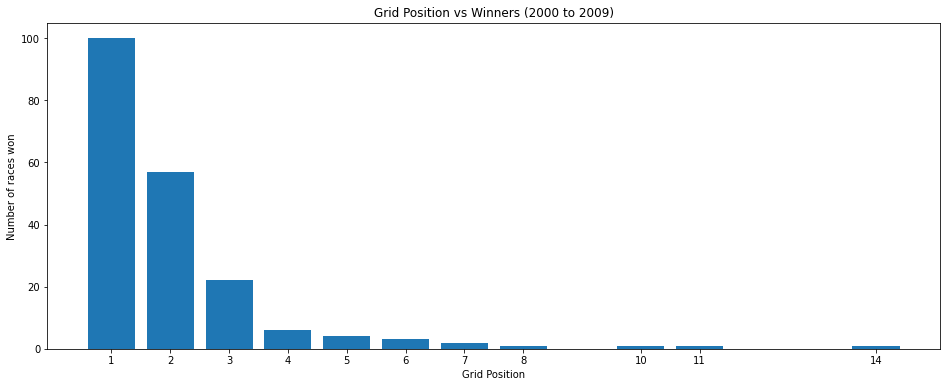

In [17]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Grid Position vs Winners (2000 to 2009)')
plt.xlabel("Grid Position")
plt.xticks(x_axis)
plt.ylabel("Number of races won");

#### 2010 to 2019

In [12]:
races_filtered = merged_df.loc[(merged_df['year'] >= 2010) & (merged_df['year'] < 2020) & (merged_df['position'] == 1)]

In [13]:
grid_numbers = races_filtered.groupby(['grid'])['grid'].count().reset_index(name='count')

In [14]:
x_axis = grid_numbers['grid']

In [15]:
y_axis = grid_numbers['count']

<Figure size 432x288 with 0 Axes>

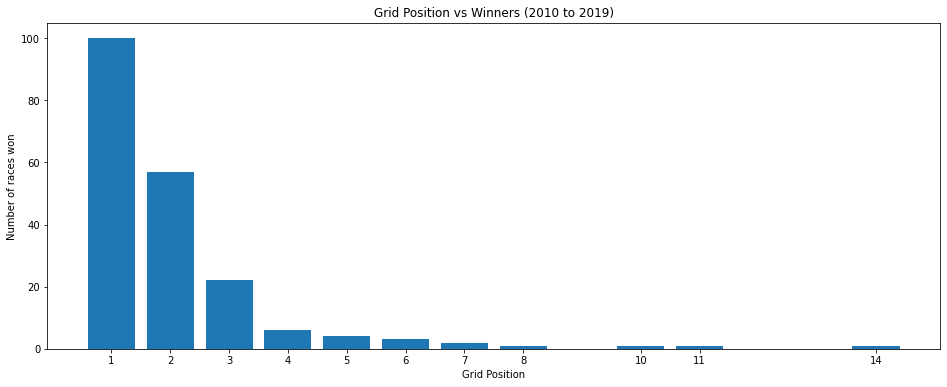

In [18]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Grid Position vs Winners (2010 to 2019)')
plt.xlabel("Grid Position")
plt.xticks(x_axis)
plt.ylabel("Number of races won");

### Conclusion: There is a maximal correlation between the starting position and the winning position. However, another caveat to this is that the starting position is decided based on the qualifying race where the grid positions are decided on the lap times, with the driver to set the fastest time qualifying on pole, i.e. 1st place. Here, a lot more factors come into consideration.